In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [3]:

def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range
                      (n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

In [4]:
df = pd.read_csv('D:\ML\pollution_test_data1.csv')

In [5]:
df

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
0,-16,4,1027,SE,3.58,0,0,128
1,-17,5,1027,SE,7.60,0,0,77
2,-16,4,1027,SE,9.39,0,0,65
3,-16,1,1028,cv,0.89,0,0,79
4,-14,0,1028,NE,1.79,0,0,93
...,...,...,...,...,...,...,...,...
341,-23,-2,1034,NW,231.97,0,0,8
342,-22,-3,1034,NW,237.78,0,0,10
343,-22,-3,1034,NW,242.70,0,0,10
344,-22,-4,1034,NW,246.72,0,0,8


In [6]:
df["wnd_dir"].unique()

array(['SE', 'cv', 'NE', 'NW'], dtype=object)

In [7]:
# Encoding the string based data feature into integers

def func(s):
    if s == "SE":
        return 1
    elif s == "NE":
        return 2
    elif s == "NW":
        return 3
    else:
        return 4

df["wind_dir"] = df["wnd_dir"].apply(func)

In [8]:
del df["wnd_dir"]

In [9]:
df

,dew,temp,press,wnd_spd,snow,rain,pollution,wind_dir
0,-16,4,1027,3.58,0,0,128,1
1,-17,5,1027,7.60,0,0,77,1
2,-16,4,1027,9.39,0,0,65,1
3,-16,1,1028,0.89,0,0,79,4
4,-14,0,1028,1.79,0,0,93,2
...,...,...,...,...,...,...,...,...
341,-23,-2,1034,231.97,0,0,8,3
342,-22,-3,1034,237.78,0,0,10,3
343,-22,-3,1034,242.70,0,0,10,3
344,-22,-4,1034,246.72,0,0,8,3


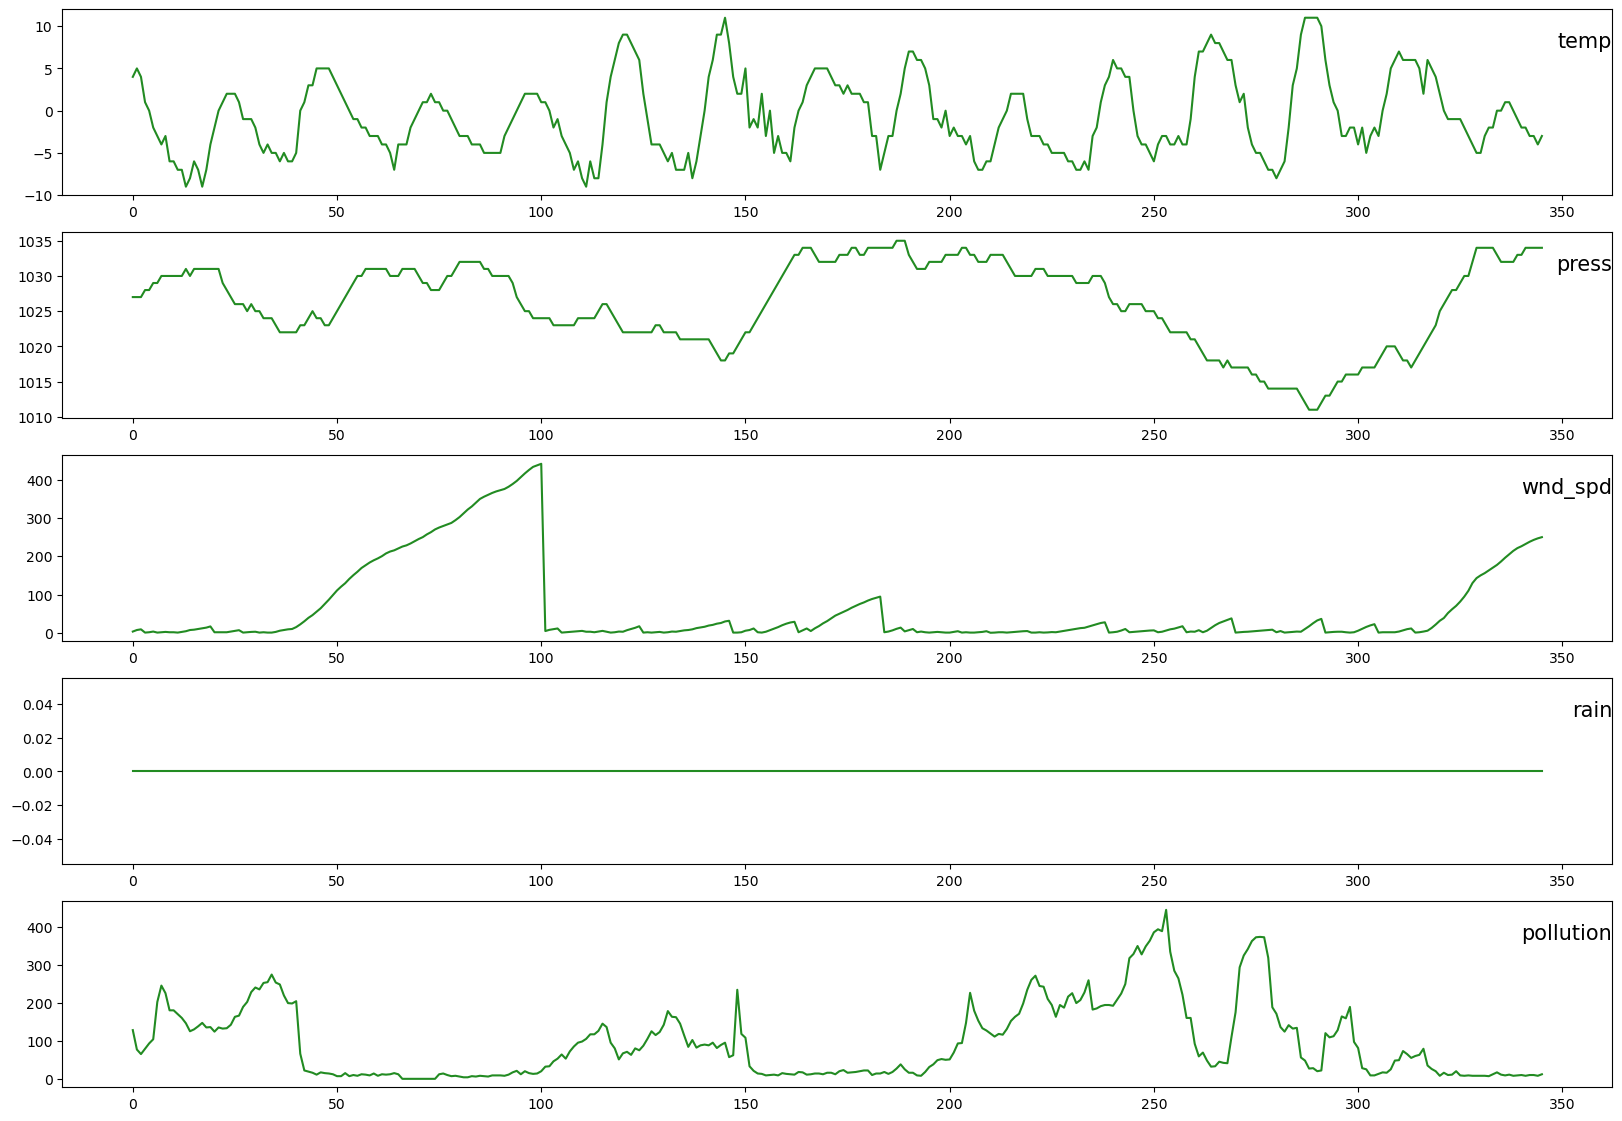

In [10]:
values = df.values

# specify columns to plot
groups = [1, 2, 3, 5, 6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

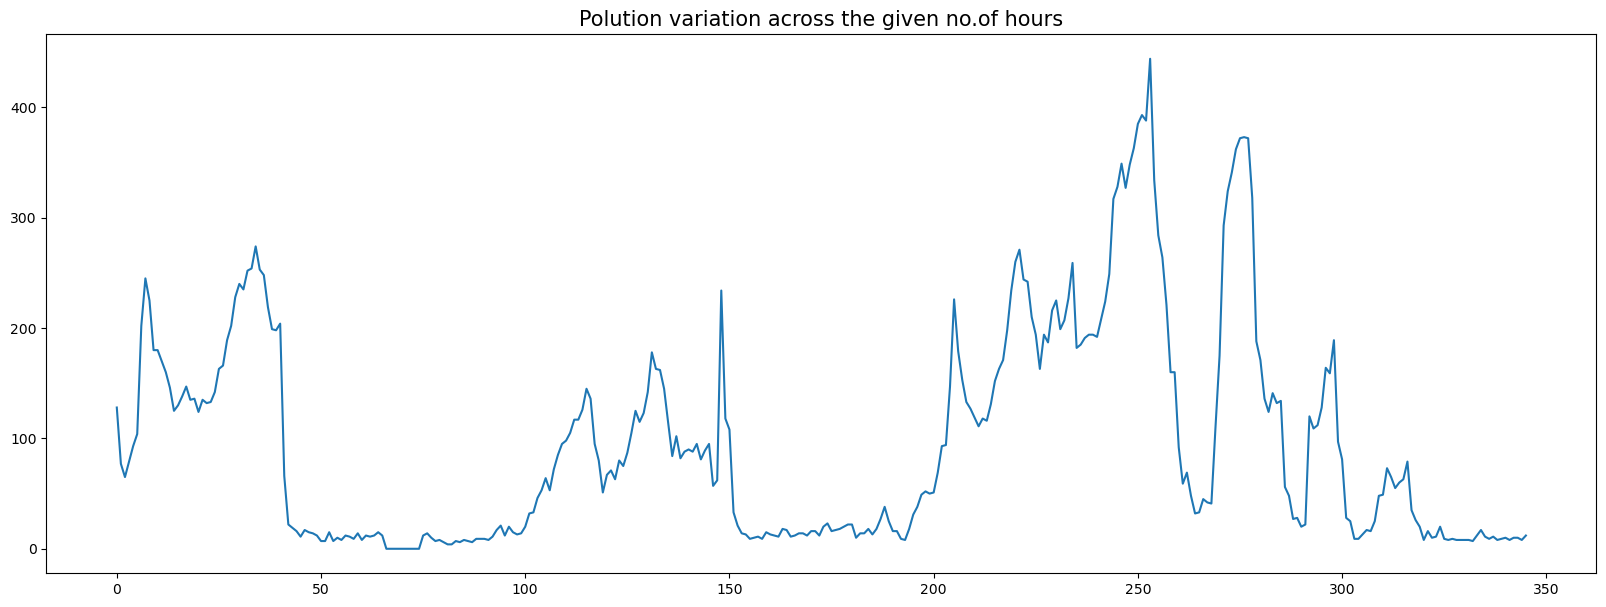

In [11]:
fig = plt.figure(figsize = (20,7))
plt.plot(df.pollution)
plt.title("Polution variation across the given no.of hours", fontsize = 15)
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [14]:
dataset = df
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [15]:
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)

(345, 16)


In [16]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.523809       0.65   0.666668   0.007102        0.0        0.0   
2   0.476190       0.70   0.666668   0.016223        0.0        0.0   
3   0.523809       0.65   0.666668   0.020285        0.0        0.0   
4   0.523809       0.50   0.708336   0.000998        0.0        0.0   
5   0.619048       0.45   0.708336   0.003040        0.0        0.0   

   var7(t-1)  var8(t-1)   var1(t)  var2(t)   var3(t)   var4(t)  var5(t)  \
1   0.288288   0.000000  0.476190     0.70  0.666668  0.016223      0.0   
2   0.173423   0.000000  0.523809     0.65  0.666668  0.020285      0.0   
3   0.146396   0.000000  0.523809     0.50  0.708336  0.000998      0.0   
4   0.177928   1.000000  0.619048     0.45  0.708336  0.003040      0.0   
5   0.209459   0.333333  0.571429     0.35  0.750000  0.007102      0.0   

   var6(t)   var7(t)   var8(t)  
1      0.0  0.173423  0.000000  
2      0.0  0.146396  0.000000  
3      0.0  0.177928  1

In [17]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var1(t)', 'var2(t)', 'var3(t)',
       'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)'],
      dtype='object')

In [18]:
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.523809       0.65   0.666668   0.007102        0.0        0.0   
2   0.476190       0.70   0.666668   0.016223        0.0        0.0   
3   0.523809       0.65   0.666668   0.020285        0.0        0.0   
4   0.523809       0.50   0.708336   0.000998        0.0        0.0   
5   0.619048       0.45   0.708336   0.003040        0.0        0.0   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.288288   0.000000  0.476190  
2   0.173423   0.000000  0.523809  
3   0.146396   0.000000  0.523809  
4   0.177928   1.000000  0.619048  
5   0.209459   0.333333  0.571429  


In [19]:
values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 365 * 24 * 3

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(345, 1, 8) (345,) (0, 1, 8) (0,)


In [20]:
train.shape, test.shape, values.shape

((345, 9), (0, 9), (345, 9))

In [21]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/50
4/4 - 4s - loss: 0.3807 - val_loss: 0.2376 - 4s/epoch - 956ms/step
Epoch 2/50
4/4 - 0s - loss: 0.3327 - val_loss: 0.2072 - 36ms/epoch - 9ms/step
Epoch 3/50
4/4 - 0s - loss: 0.2885 - val_loss: 0.1796 - 34ms/epoch - 9ms/step
Epoch 4/50
4/4 - 0s - loss: 0.2475 - val_loss: 0.1546 - 36ms/epoch - 9ms/step
Epoch 5/50
4/4 - 0s - loss: 0.2096 - val_loss: 0.1322 - 34ms/epoch - 9ms/step
Epoch 6/50
4/4 - 0s - loss: 0.1748 - val_loss: 0.1124 - 127ms/epoch - 32ms/step
Epoch 7/50
4/4 - 0s - loss: 0.1432 - val_loss: 0.0954 - 36ms/epoch - 9ms/step
Epoch 8/50
4/4 - 0s - loss: 0.1150 - val_loss: 0.0814 - 32ms/epoch - 8ms/step
Epoch 9/50
4/4 - 0s - loss: 0.0906 - val_loss: 0.0706 - 33ms/epoch - 8ms/step
Epoch 10/50
4/4 - 0s - loss: 0.0702 - val_loss: 0.0629 - 34ms/epoch - 9ms/step
Epoch 11/50
4/4 - 0s - loss: 0.0539 - val_loss: 0.0582 - 32ms/epoch - 8ms/step
Epoch 12/50
4/4 - 0s - loss: 0.0416 - val_loss: 0.0561 - 33ms/epoch - 8ms/step
Epoch 13/50
4/4 - 0s - loss: 0.0332 - val_loss: 0.0561 - 33

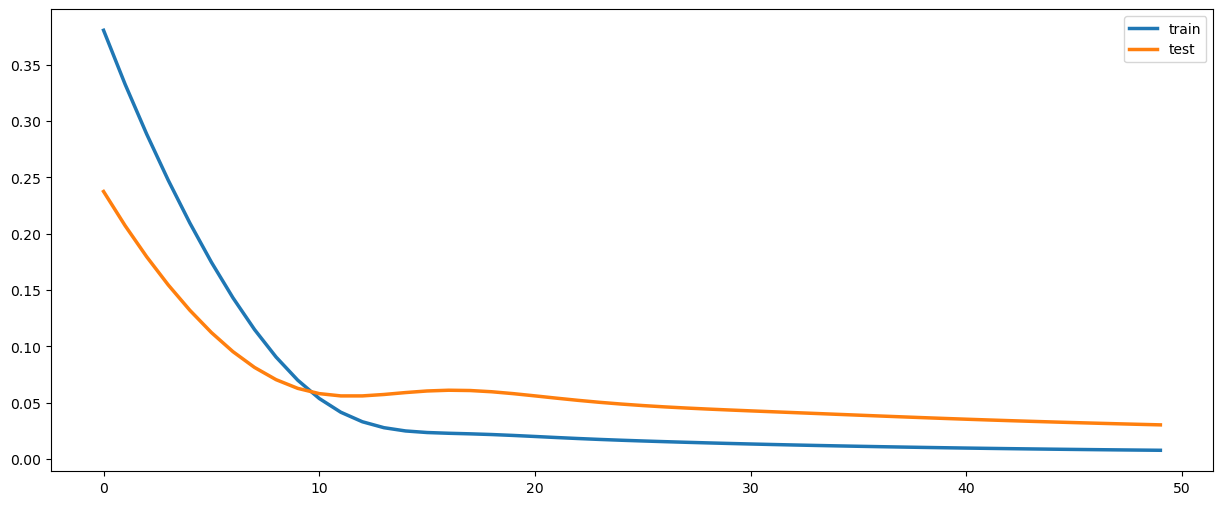

In [23]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()


In [24]:
test_X.shape

(0, 1, 8)

In [28]:
y_test_true = test[:,8]

In [30]:
model2 = Sequential()
model2.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2])))
model2.add(Dense(64))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Dense(1))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               271360    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 288129 (1.10 MB)
Trainable params: 288001 (1.10 MB)
Non-trainable params: 128 (512.00 Byte)
______________